<a href="https://colab.research.google.com/github/Coyote-Schmoyote/breast-cancer-clf-model/blob/main/breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. Predicting breast cancer using a machine learning model

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not somebody has breast cancer.

## 1. Problem definition
The problem presented in this notebook is based on an exercise from 「東京大学のデータサイエンティスト育成講座」. In the original exercise, the accuracy score of the breast cancer prediciton model was 95.8%. The goal in this notebook is to improve the accuracy, with `random seed` set as 0.

## 2. Data
The data contains information of breat cancer patients, and is donated in 1995 by the University of Wisconsin. It has 569 samples with 32 attributes. 
This data set is built in scikit-learn, and can be imported using `from sklearn.datasets import load_breast_cancer`.
**More information about data set:** https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic) 

## 3. Features
Attribute information:
* ID number
* Diagnosis (M = malignant, B = benign)
* 3-32: Ten real-valued features are computed for each cell nucleus:
 * a) radius (mean of distances from center to points on the perimeter)
 * b) texture (standard deviation of gray-scale values)
 * c) perimeter
 * d) area
  * e) smootness (local variation in radius lengths)
  * f) compactness (perimeter^2 / area - 1.0)
  * g) concavity (severity of concave portions of the contour)
  * h) concave points (number of concave portions of the contour)
  * i) symmetry
  * j) fractal dimension ("coastline approximation" -1)

## 4. Evaluation
The project will be considered successful if we reach accuracy score higher than 95.8% at predicting whether the patient has a malignant or benign tumor.

### Import all the tools




In [94]:
# import regular libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import models from Scikit-learn
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# import model evaluation tools
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

# import data
from sklearn.datasets import load_breast_cancer





### Scikit-Learn built-in datasets

Scikit-Learn has 7 built-in datasets (also called "toy datasets") that we can use for machine learning projects. The main advantage of the Scikit-Learn datasets is that they are clean and ready to use right away. 
> Using these datasets, we don‘t have to spend time prepraing and transforming the data as much as we would using other datasets.

The dataset we are using for this project includes data on 569 breast cancer scans, with 32 attributes each. 
**More about `load_breast_cancer` dataset** : https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html?highlight=load_breast_cancer



In [95]:
# save and view the data set 
data = load_breast_cancer()

data

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.

Hmm... What is this? So, the thing with the Scikit-Learn datasets is that they don‘t return the data in a tabular format, like we are used to. Instead, it returns a `bunch` object.
A `bunch object` is, essentially, a dictionary. Similarly to usual dictionaries, a `bunch`
 object has `keys` (words) and `values` (definitions).

In [96]:
# let‘s see the keys
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

We received 7 keys:
* `data`: array of all the feature data
* `target`: array of the target data (the variable that we want to predict)
> `data` and `target` is the actual data. 
* `frame`: shape of the data
* `target_names`: list of target classes names  
* `DESCR`: string with the full description of the dataset
* `feature_names`: list of dataset column names
* `filename`: string with a path to the data locaiton
> these keys serve a descriptive purpose, and we don‘t really use them when building a model.

In [97]:
# let‘s look at DESCR key‘s value
data.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.  For inst

To make the dataset exploration easier, let‘s convert it to `pandas.DataFrame`

In [98]:
# Turn the feature data into a dataframe
df = pd.DataFrame(data.data, 
                  columns = data.feature_names)

# Add the target columns, and fill it with the target data
df["target"] = data.target

# Show the dataframe
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [99]:
# See the dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [100]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

### Observations: 
* All data is numerical. It means that we don‘t have to spent time converting categorical datatypes to numerical ones. 
* There are no missing values, so we don‘t have to worry about accounting for the missing data.
>All scikit-learn‘s built-in datasets are fully numerical, and nave no missing values, which make them very easy to use.

**List of Scikit-Learn toy datasets:** https://scikit-learn.org/stable/datasets/toy_dataset.html

## Data Visualization
Data visualization is a great tool to understand our data better. Let‘s use it to our advantage and plot some of the features.

In [101]:
# see the target value counts
df["target"].value_counts()

1    357
0    212
Name: target, dtype: int64

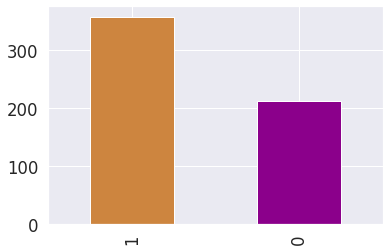

In [102]:
# plot value counts
df["target"].value_counts().plot(kind="bar", color=["peru", "darkmagenta"]);

### Correlation matrix
We san also make a correlation matrix using seaborn, that we imported as `sns`. Corelation matrix reveals the relationships between all the possible pairs of values in a table. The scale on the right side of the heatmap reveals how interconnected the variables are, 1.0 being the highest, and 0 being the lowest degree of correlation. 
**More about `seaborn` heatmaps**: https://seaborn.pydata.org/generated/seaborn.heatmap.html 

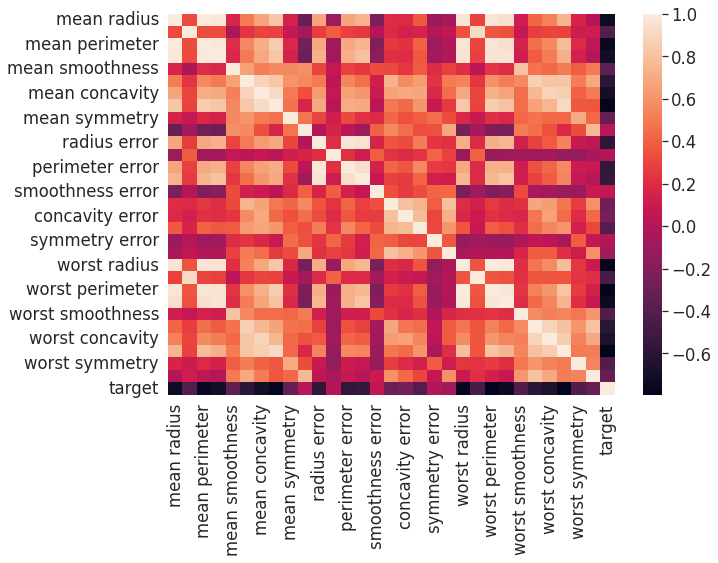

In [103]:
# Make the correlation matrix 
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10, 7))
ax = sns.heatmap(corr_matrix)

### Observations:
* From the bar chart, we see that there are more samples of benign than malignant tumors in the dataset.
* Judging from the heatmap, mean fractal dimension, texture error, smoothness error, symmetry error and fractal dimension error seem to influence the target variable the most.

## Split data into train and test sets
To prepare our data for machine learning, there are two steps we need to take:

* Split data into X (features) and y (target)
> X refers to all the variables that the machine model uses to make a prediction. The fetaures correspond with the column names. Y, on the other hand, refers to a target variable, or the correct answer. In our case, the correct answer (what the machine is supposed to predict) is whether the scan shows a benign (1) or malignant (0) tumor.

* Split data into test and train sets
> Essentially, we train the model on train set (about 80% of the data), and then we see how well it can predict the target variable on the remaining 20% of data. To split the data, we are using a `scikit-learn` module `train_test_split`.

## Random seed
>Current project seeks to achieve accuracy level of 95.8% or higher on breact cancer classification problem, with random seed set as 0. 

So what exactly is a random seed (or random state)? 
A "seed" makes our results reproducible, so if we repeat our experiment, we can get the same results. It is a pseudo-random number generator (prng), which generates a random number sequence, starting from a base value. By setting a seed, we are setting that base value.

In [104]:
# store data in X and y variables
X = data.data
y = data.target

# Split the data using Scikit-Learn‘s train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=0)

## Choosing a Machine Learning Model

Different machine learning models are suitable for different problems. In supervised learning, there are two types of machine learning problems: classification and regression. We are dealing with a classification problem, because we need to teach the machine to categorize whether a scan is benign (1) or malignant (0). 
> We can use this map to help us choose the right machine learning model: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html 

For our data, we will try 4 different machine learning models: Logistic Regression, KNN, LinearSVC, and Random Forest Classifier.

### Logistic Regression
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/53/Sigmoid-function-2.svg/1200px-Sigmoid-function-2.svg.png" width="500" align="right">
Logistic Regression is a statistical method, which uses a Sigmoid function. Even though it is a regression model, it can be successfully used as a classification technique, particularly for binary classification problems (yes-or-no type of questions), if a decision threshold is set. A value below that threshold indicates one class (for example, "no"), and a value above the threshold indicates another class ("yes"). For example, in the picture below, the threshold is set at 0.5.

* Advantages:
 * Easy to implement, interpret, and train. It is very fast at classifying.
 * Performs well when the dataset is linearly separable.
* Disadvantages:
 * The main limitation is the assumption of linearity between the dependent variable and the independent variables.
 * More powerful and compact algorithms such as Neural Networks can easily outperform this algorithm.

> Read more: https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

###KNN
<img src=https://scikit-learn.org/stable/_images/sphx_glr_plot_nca_classification_001.png width="500" align="right">
 K-Nearest Neighbors (KNN) is an algorithm that assumes that similar things exist in close proximity. "Birds of a feather flock together." KNN algorithm calculates the distance between different data points, and groups them based on how close or how far they are. 
"K" in KNN is a parameter that refers to the number of nearest neighbors to include in the the voting process. For example, we introduce a new data point. "Is this scan benign or malignant?" If `k=5`, the answer will depend on the answers of 5 neighbors. If 4 out of 5 naighbors are malignant, the new data point will also be classified as malignant. We can find the best K number through experimentaiton, by running the algorithm several times and choose the K that has the least amount of error.

* Advantages:
 * Simple and easy to implement.
 * Can be used for classification, regression, and search problems.
* Disadvantages:
  * Gets slower as the number of examples and/or features increases.

> Read more: https://scikit-learn.org/stable/modules/neighbors.html#classification 
  

###Linear SVC
<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_separating_hyperplane_001.png" width="500" align="right">  Vector Machines (SVM) is an algorithm that is used for classification, regression, and outliers detection models. An SVM model tries to find the the optimal hyperlane (threshold) between different classes. The point closest to the hyperplane are called *support vector points*. The distance between the support vector points and the hyperplane is called *margin*. The farther are the support vector points from the hyperplane, the higher is the probability that they will be correctly classified.

If we cannot separate the classes in a given space, we can use the *kernel trick* to try and separate our data point in a higher dimensional space (for example, 3D, or infinite dimension space). There are 3 types of kernels:
1. Linear kernel
2. Polynomial kernel
3. Radial basis function kernel (RBF)/Gaussian kernel 

**LinearSVC** (Support Vector Classification) is a class of SVM, used for classification problems, and uses linear kernel (also sometimes refferd to as "non-kernel"). In other words, the classes can be separated using a single line. It is best to always try linear kernel first (because it is faster to train and test), and only if the result is not good, try a nonlinear kernel.

* Advantages:
 * Effective when the number of features are more than training examples.
 * Best algorithm when the classes are separable.
 * Suited for extreme case binary classification.
* Disadvantages:
  * Not suitable for large datasets, because takes a long time to process.
  * Does not perform well with overlapping classes.
  * Selecting the appropriate kernel function can be tricky.

> Read more: https://scikit-learn.org/stable/modules/svm.html#svm-kernels 

### Random Forest 
<img src="https://upload.wikimedia.org/wikipedia/commons/d/d8/Decision_Tree_vs._Random_Forest.png" width="500" align="right">
Random Forest is an algorithm within ensemble methods. Ensemble methods combine predictions of several estimators to reach the final prediction. Random Forest is composed of a number of decision trees (estimators). Random Forest method includes two classes: `RandomForestClassifier` 
 and `RandomForestRegressor`. For our current project, we are going to use `RandomForestClassifier`. In a classification problem, each tree votes whether it thinks the cancer scan is malignant (0) or benign (1), and the most popular answer is chosen as the final result.

* Advantages:
  * Low risk of overfitting
  * Robust to outliers
  * Runs efficiently on large datasets 
  * Has a higher accuracy score than other algorithms

* Disadvantages:
  * Can be biased when dealing with categorical data
  * Slow training
  * Not suitable for linear models with many missing values

> Read more: https://scikit-learn.org/stable/modules/ensemble.html#forest 

In [105]:
# Create a dictionary of machine learning algorithms

models = {"Logistic regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Linear SVC": LinearSVC(),
          "Random Forest": RandomForestClassifier()}

 # Create a funtion to train (fit) and score models
def train_score(models, X_train, X_test, y_train, y_test):
  # Set random seed
  np.random.seed(0)
  # Make an empty dictionary for model scores
  scores = {}  
  # Loop through models
  for name, model in models.items():
      #Fit the model to the data
      model.fit(X_train, y_train)
      #Evaluate the model and append its score to the scores dictionary
      scores[name] = model.score(X_test, y_test)
  return scores

In [106]:
# let‘s try the function
scores = train_score(models = models,
                   X_train = X_train,
                   X_test = X_test,
                   y_train = y_train,
                   y_test = y_test)

scores

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


{'KNN': 0.9385964912280702,
 'Linear SVC': 0.9385964912280702,
 'Logistic regression': 0.9473684210526315,
 'Random Forest': 0.9649122807017544}

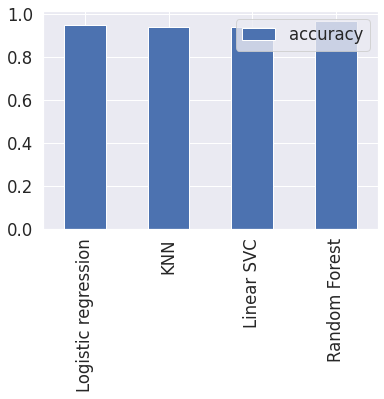

In [107]:
# Model comparison
model_compare = pd.DataFrame(scores, index=["accuracy"])
model_compare.T.plot.bar();

### Observations:
All models performed reasonably well. Logistic Regression model gave us the accuracy score of `0.947`, and Random Forest performed even better, with a score `0.965`. In the problem definition we stated, that if we train a model that scores higher than `0.958`, the model will be considered successful. As we can see, just by choosing a different model, we got a better result. But let‘s see, if we can improve the scores for these two models even more with hyperparameter tuning (or optimization).

## Hyperparameter tuning
When training a machine learning model, hyperparameter tuning can be crucial, because hyperparameters control overall behaior of the model. Each machine learning model has a different set of hyperparameters that can be configured. After receiveing the accuracy score, we decided to follow through with two best-performing models: `RandomForestClassifier` and `LogisticRegression`, so we will look into their hyperparameter optimization settings. 
### Random Forest
Some of the most important parameters in Random Forest are:
* `n_estimators`: *int, default=100* is arguably the most important parameter. It represents the number of trees in a forest. Usually, the more trees, the better, but it is more computationally expensive.
* `max_depth:` *int, default=None* is used to select how deep you want to make each tree in the forest. The deeper the tree, the more information about the data it captures.
* `criterion:` *{Gini, entropy, log_loss}, default="Giny"*  measures the quality of a split. `Gini` stands for Gini impurity, `log_loss` and `entropy` stand for Shannon information gain. Usully, default is fine.
*`max_features`:*{"sqrt", "log2", "None"}, int or float, default="auto"* represents the number of features that are considered on a pre-split level when looking for the best split. 
 * `Sqrt` will take a square root of the total number of features in each individual run. For example, if the total number of variables is 100, we will take 10 in each individual tree.
 * `log2`will take the log base 2 of the number of features.
 * `None` will take the number of all the features.
For classification problems, it is advised to use "sqrt".
* `min_samples_leaf`: *int or float, deafult=1* helps determine the minimum sample number that can be sotred in a leaf node.
* `min_samples_split`: *int or float, default=2* specifies the minimum number of samples that must be present from your data for a split to happen.

> More information on RandomForest parameters: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html


## Randomized Search CV

Random search is a method from the `scikit-learn` library, in which random combinations of hypeparameters are selected from a hyperparameter grid to train a model. Then, the best random hyperparameter combination is used. Random Search CV allows us to specify which hyperparameters we want to try out (make the grid), how many combinations do we want to try out, how much computational power do we want to spend etc. 

First, let‘s create a yperparameter grid for our RandomForest model.


In [108]:
# Hyperparameter grid for RandomForest model
rf_grid = {"n_estimators":np.arange(10, 1000, 20),
           "max_depth":[None, 3, 5, 10],
           "max_features":["sqrt", "log2", "auto"],
           "min_samples_split":np.arange(2, 20, 2),
           "min_samples_leaf":np.arange(1, 20, 2)}


Before we can apply `RandomSearchCV` method, let‘s take a lot at some of the customizable parameters of `RandomSearchCV`:
* `estimator` refers to the model for which we need to optimize the parameters.
* `param_distributions` is a parameter to which we pass the dictionary of hyperparameters we need to try out. In our case, we will pass `rf_grid` that we just created.
* `cv` is the number of splits that we want to have for cross-validation. 
* `n_iter` signifies the number of hyperparameter settings that are sampled.
* `n_jobs` specifies the computational power we are willing to use for this task. Setting `n_jobs=-1` allows to use all processor. 

In [109]:
#Setup random hyperparameter search for RandomForest Classifier
random_rf = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions=rf_grid,
                               cv=5,
                               n_iter=20,
                               n_jobs=-1,
                               random_state=0)
  
# Fit random hyperparameter model
random_rf.fit(X_train, y_train)


print(f"Train score: {random_rf.score(X_train, y_train)}")
print(f"Test score: {random_rf.score(X_test, y_test)}")


Train score: 0.9758241758241758
Test score: 0.9649122807017544


In [110]:
random_rf.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 7,
 'min_samples_split': 6,
 'n_estimators': 870}

Now let‘s take a look at hyperparameters of Logistic Regression. Similarly to RandomForest, Logistic Regression has many hyperparameters. The most important hyperparameters are:
* `solver`: *{"newton-cg", "lbfgs", "liblinear", "sag", "saga"}, default="lbfgs"* is an alrogithm to use in the optimization problem. For small datasets, *liblinear* is a good choice. *Sag* and *saga* are faster for large datasets. For multiclass problems, *newton-cg*, *sag*, *saga* and *lbfgs* are suited better.
* `C`:*float, default=1.0* is an inverse of regularization strength. Smaller values specify stronger regularization. In other words, if data is very noisy, use a lower setting for C (for instance, 0.001)

> Read more: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [111]:
# Hyperparameter grid for Logistic Regression
log_reg_grid = {"C" : np.logspace(-4, 4, 20),
               "solver":["liblinear"]}

In [112]:
# Tune Logistic Regression

random_logr = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               random_state=0)

#Fit random hyperparameter search model for Logistic Regression
random_logr.fit(X_train, y_train)

print(f"Train score: {random_logr.score(X_train, y_train)}")
print(f"Test score: {random_logr.score(X_test, y_test)}")

Train score: 0.967032967032967
Test score: 0.956140350877193


In [113]:
random_logr.best_params_

{'C': 29.763514416313132, 'solver': 'liblinear'}

### Observations: 
For Random Forest Classifier, hyperparameter tuning did not give us any results for the final accuracy score. Hyperparameter tuning for Logistic Regression model, however, showed us some improvements from the original `0.947`accuracy score: ` 0.956`. 

### Data preprocessing
Another way to improve the score of our model is to return to do data pre-processing. The dataset we used for this project is a built-in toy dataset in `scikit-learn`, with no missing values, no categorical fetaures, and no dirty data, and therefore we didn‘t have to do a lot of preprocessing. In our previous project, the Abalone Age Prediction, we did some data modelling (preprocessing) before building our machine model: we had to convert `object` datatype into a numeric datatype. This is an example of data preprocessing.

> Abalone Age Predicion Project: https://colab.research.google.com/drive/1LaPYv6-9fyaSoHuqYVK3uzLYx2CFqKgt?usp=sharing

Data preprocessing is extremely important, because the quality of input data directly affects the output of our model. Usually, we do it at the beginning of the process, or, after seeing the model score, as a part of the experimentation process to improve the score. Typically, these are the steps of data preprocessing:

1. Take care of missing values in the dataset.
2. Encode categorical (non-numeric) data.
3. Split the data into train and test sets.
4. Scale the features.

First three steps are already taken care of, and we don‘t need to do them again. Let‘s take a closer look at step 4, to see if we can improve the accuracy of our models.

### Feature scaling
Feature scaling is a method used to standardize the range of the data features. 
In our dataset, we have columns that contain variables that are different in scale and cannot be compared to each other.


In [114]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


For example, it these rows of our dataset, `mean radius` column has values on scale 10-21,`mean area` has values on scale 386-1326, and `mean smoothness` has values between  0.08-0.1. All these columns are different in scale, and it makes sense in the context of each column. But machine learning algorithms cannot comprehend the numbers contextually, and therefore there is a high chance that they might consider, for example, columns with higher values to be more important, than columns with the lower values. One way to solve this problem is by conducting **data stadardization** using `StandardScaler`.

## Standard Scaler

`StandardScaler` is a `scikit-learn` module that standardizes features by removing the mean and scaling to unit variance. In other words, `StandardScaler` makes the variables across all the features more comparable for the algorithm, by standardizing them, and centering them around 0. Logistic Regression and KNN models particularly benefit from feature scaling.
Let‘s try scaling the data and fit it to our RandomForest, KNN, and Logistic Regression models.

Now that we have tuned `RandomForestClassifier` and `LogisticRegression`, we can see that `RandomForestClassifier` performs better. So let‘s　proceed with `RandomForestClassifier` and make some predictions.

In [115]:
# import Standard Scaler
from sklearn.preprocessing import StandardScaler

# instantiate Standard Scaler
sc = StandardScaler()

# fit on our train data
sc.fit(X_train)

# transform ans store scaled train and test data in new variables
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [116]:
# original train data array
X_train

array([[1.005e+01, 1.753e+01, 6.441e+01, ..., 6.499e-02, 2.894e-01,
        7.664e-02],
       [1.080e+01, 2.198e+01, 6.879e+01, ..., 7.485e-02, 2.965e-01,
        7.662e-02],
       [1.614e+01, 1.486e+01, 1.043e+02, ..., 1.129e-01, 2.778e-01,
        7.012e-02],
       ...,
       [9.436e+00, 1.832e+01, 5.982e+01, ..., 5.052e-02, 2.454e-01,
        8.136e-02],
       [9.720e+00, 1.822e+01, 6.073e+01, ..., 0.000e+00, 1.909e-01,
        6.559e-02],
       [1.151e+01, 2.393e+01, 7.452e+01, ..., 9.653e-02, 2.112e-01,
        8.732e-02]])

In [117]:
# scaled train data array
X_train_std

array([[-1.15036482, -0.39064196, -1.12855021, ..., -0.75798367,
        -0.01614761, -0.38503402],
       [-0.93798972,  0.68051405, -0.94820146, ..., -0.60687023,
         0.09669004, -0.38615797],
       [ 0.574121  , -1.03333557,  0.51394098, ..., -0.02371948,
        -0.20050207, -0.75144254],
       ...,
       [-1.32422924, -0.20048168, -1.31754581, ..., -0.97974953,
        -0.71542314, -0.11978123],
       [-1.24380987, -0.2245526 , -1.28007609, ..., -1.75401433,
        -1.58157125, -1.00601779],
       [-0.73694129,  1.14989702, -0.71226578, ..., -0.27460457,
        -1.25895095,  0.21515662]])

Now, that we have scaled our data, let‘s try to fit 3 models: `RandomForestClassifier`, because it performed the best, and `LogisticRegressor` and `KNN`, because they are supposed to benefit the most from data scaling.

In [118]:
# make a dictionary of our models
models = {"Logistic regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# use the function for model fitting and socring that we created earlier
scores_scaled = train_score(models = models,
                   X_train = X_train_std,
                   X_test = X_test_std,
                   y_train = y_train,
                   y_test = y_test)

scores_scaled

{'KNN': 0.956140350877193,
 'Logistic regression': 0.9649122807017544,
 'Random Forest': 0.9649122807017544}

Let‘s compare scaled scores with the original ones:

In [119]:
scores

{'KNN': 0.9385964912280702,
 'Linear SVC': 0.9385964912280702,
 'Logistic regression': 0.9473684210526315,
 'Random Forest': 0.9649122807017544}

### Observation: 
`RandomForest` score remained the same, but, a sexpected, `KNN` and `Logistic Regression` improved quite a bit. Now, afte rscaling the data, both `RandomForest` and `Logistic Regression` have a score of `0.964`, and `KNN` improved from `0.938` to `0.956`.

### Hyperparameter tuning #2
We already performed hyperparameter tuning earlier. As we can remember, the parameter tuning of `RandomForest` didn‘t affect the accuracy score, however, hyperparameter tuning for `Logistic Regression` managed to slightly improve the model. Let‘s try to tune the hyperparameters one more time using `RandomizedSearchCV` and the same hyperparameter grids we used before.

In [120]:
#Fit random hyperparameter search model for Logistic Regression
random_logr.fit(X_train_std, y_train)

print(f"Train score: {random_logr.score(X_train_std, y_train)}")
print(f"Test score: {random_logr.score(X_test_std, y_test)}")

Train score: 0.989010989010989
Test score: 0.9649122807017544


In [121]:
# Check best parameters
random_logr.best_params_

{'C': 0.615848211066026, 'solver': 'liblinear'}

In [132]:
# Use parameters as the best model
best_logr = LogisticRegression()
best_logr.set_params(**random_logr.best_params_)

# Fit best model
best_logr.fit(X_train_std, y_train)

#Score best model
best_logr.score(X_test_std, y_test)

0.9649122807017544

In [73]:
# Fit random hyperparameter model for Random Forest
random_rf.fit(X_train_std, y_train)


print(f"Train score: {random_rf.score(X_train_std, y_train)}")
print(f"Test score: {random_rf.score(X_test_std, y_test)}")

Train score: 0.9736263736263736
Test score: 0.9649122807017544


In [124]:
# Check best parameters
random_rf.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 7,
 'min_samples_split': 6,
 'n_estimators': 870}

In [131]:
# Use parameters for the best model
best_rf = RandomForestClassifier()
best_rf.set_params(**random_rf.best_params_)

# Fit best model
best_rf.fit(X_train_std, y_train)

# Score best model
best_rf.score(X_test_std, y_test)

0.9649122807017544

Let‘s try to tune `KNN` model as well. The most important hyperparameter for `KNN` is the number of neighbors `n_neighbors`, which is set to `5` by default. Apart from the number of neighbors, we can also try adjusting `weights` and `metric`.
> Read more: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html 

In [74]:
# make a grid for knn

knn_grid = {"n_neighbors" : np.arange(1,21,2),
            "weights" : ["uniform", "distance"],
            "metric" : ["euclidean", "manhattan", "minkowski"]}


#Setup random hyperparameter search for KNN

knn = RandomizedSearchCV(KNeighborsClassifier(),
                         param_distributions=knn_grid,
                         cv=5,
                         n_iter=20,
                         n_jobs=-1,
                         random_state=0)
  
# Fit random hyperparameter model
knn.fit(X_train_std, y_train)


print(f"Train score: {random_rf.score(X_train_std, y_train)}")
print(f"Test score: {random_rf.score(X_test_std, y_test)}")

Train score: 0.9736263736263736
Test score: 0.9649122807017544


In [126]:
# Check best parameters
knn.best_params_

{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}

Perfect. Now that we know the best parameters, let‘s use them to make the best performing models for each algorithm, and fit them to our data.

In [133]:
# Use parameters for the best model
best_knn = KNeighborsClassifier()
best_knn.set_params(**knn.best_params_)

# Fit best model
best_knn.fit(X_train_std, y_train)

# Score best model
best_knn.score(X_test_std, y_test)

0.9473684210526315

In [134]:
# make predictions
y_preds_rf = best_rf.predict(X_test_std)
y_preds_lr = best_logr.predict(X_test_std)
y_preds_knn = best_knn.predict(X_test_std)

# create a dictionary of preds and true labels
dict = {"Random Forest": {"predictions": y_preds_rf, "true labels": y_test},
        "Logistic Regression" : {"predictions": y_preds_lr, "true labels": y_test},
        "KNN": {"predictions": y_preds_knn, "true labels": y_test}
        }

# make a dataframe with predictions and true labels
df = pd.DataFrame(dict)

In [135]:
df.head(10)

,Random Forest,Logistic Regression,KNN
predictions,"[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, ...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, ...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, ..."
true labels,"[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


Judging from our dataframe, we can see that our model seems to be doing pretty well. To have compare the predicitons and true labels in a more visual and easy-to-understand way, we an use a confusion matrix.

## Confusion matrix 
<img src="https://miro.medium.com/max/431/0*AN_NBuYefGEHm6hP" width=500, align="right">
Confusion matrix is used to evaluate the accuracy of a classification model. When we have 2 classes in the output (in our case, "benign" and "malignant"), the confusion matrix is a table with 4 different combinations of predicted and actual values:

* **True Positive (TP)** is when the model predicted that a scan is good, and it actually is good.
* **False Positive (FP)** is when the model predicted that a scan is good, but in reality, it is bad.
* **True Negative(TN)** is when the model predicted that the scan is bad, and it is actually bad.
* **False Negative (FN)** is when the model predicted that the scan is bad, but it actually is good.

In short, the ocnfusion matrix visualizes and summarizes the performance of a classification algorithm.

In [136]:
# Confusion matrix
print(f"Random Forest: \n{confusion_matrix(y_test, y_preds_rf)}")
print(f"Logistic Regression: \n{confusion_matrix(y_test, y_preds_lr)}")
print(f"KNN: \n{confusion_matrix(y_test, y_preds_knn)}")

Random Forest: 
[[45  2]
 [ 2 65]]
Logistic Regression: 
[[45  2]
 [ 2 65]]
KNN: 
[[43  4]
 [ 2 65]]


Random Forest
Logistic Regression
KNN


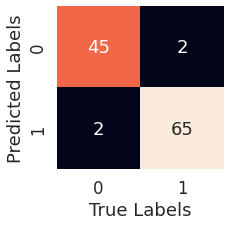

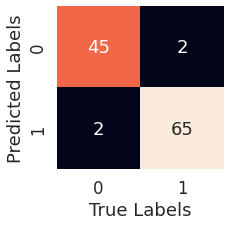

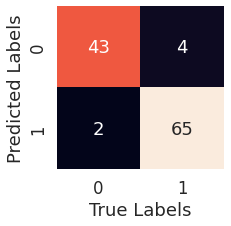

In [137]:
# Make it more visual with seaborn
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test, y_preds):
  """
  Plots a nice looking confusion matrix using seaborn heatmap()
  """
  fig, ax = plt.subplots(figsize=(3, 3))
  ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                   annot=True,
                   cbar=False)
  plt.xlabel("True Labels")
  plt.ylabel("Predicted Labels")

print("Random Forest")
plot_conf_mat(y_test, y_preds_rf)

print("Logistic Regression")
plot_conf_mat(y_test, y_preds_lr)

print("KNN")
plot_conf_mat(y_test, y_preds_knn)


## Conclusion

We achieved a 96.4% accuracy score on our breast cancer classification model, using Random Forest Classifier and Linear Regression. 